In [1]:
import pandas as pd

compra_venta_completo = pd.read_csv(r"..\data_raw\compra_venta_completo.csv")

compra_venta_completo_barri = compra_venta_completo[compra_venta_completo['Tipo de territorio'] == 'Barri' ]

compra_venta_completo_long = compra_venta_completo_barri.melt(
   id_vars=['Territorio', 'Tipo de territorio'],
    value_vars=['2012', '2013','2014','2015','2016','2017','2018','2019', '2020', '2021', '2022', '2023', '2024'],
    var_name='Año',
    value_name='Venta'
) 
compra_venta_completo_long = compra_venta_completo_long.rename(columns={
    'Territorio': 'Barrio'
})

compra_venta_completo_long = compra_venta_completo_long.drop(columns= ['Tipo de territorio'])
compra_venta_completo_long

,Barrio,Año,Venta
0,el Raval,2012,1816.11
1,el Barri Gòtic,2012,2409.44
2,la Barceloneta,2012,2873.50
3,"Sant Pere, Santa Caterina i la Ribera",2012,2789.66
4,el Fort Pienc,2012,2592.81
...,...,...,...
931,Diagonal Mar i el Front Marítim del Poblenou,2024,5608.80
932,el Besòs i el Maresme,2024,2700.84
933,Provençals del Poblenou,2024,3544.15
934,Sant Martí de Provençals,2024,3020.60


In [2]:
compra_venta = pd.read_csv(r"..\data_raw\compraventa_viviendas_filtrado.csv")
compra_venta_barri = compra_venta[compra_venta['Tipo de territorio'] == 'Barri' ]
compra_venta_long = compra_venta_barri.melt(
   id_vars=['Territorio', 'Tipo de territorio'],
    value_vars=['2020', '2021', '2022', '2023', '2024'],
    var_name='Año',
    value_name='Venta'
) 
compra_venta_long = compra_venta_long.rename(columns={
    'Territorio': 'Barrio'
})
compra_venta_long = compra_venta_long.drop(columns= ['Tipo de territorio'])
compra_venta_long

,Barrio,Año,Venta
0,el Raval,2020,2910.10
1,el Barri Gòtic,2020,4183.06
2,la Barceloneta,2020,3779.24
3,"Sant Pere, Santa Caterina i la Ribera",2020,4344.93
4,el Fort Pienc,2020,3492.44
...,...,...,...
355,Diagonal Mar i el Front Marítim del Poblenou,2024,5608.80
356,el Besòs i el Maresme,2024,2700.84
357,Provençals del Poblenou,2024,3544.15
358,Sant Martí de Provençals,2024,3020.60


In [3]:
alquiler = pd.read_csv(r"..\data_raw\alquiler_viviendas_filtrado.csv")
alquiler_barri = alquiler[alquiler['Tipo de territorio'] == 'Barri']
alquiler_long = alquiler_barri.melt(
    id_vars=['Territorio', 'Tipo de territorio'],
    value_vars=['2020', '2021', '2022', '2023', '2024'],
    var_name='Año',
    value_name='Alquiler'
)
alquiler_long = alquiler_long.rename(columns={
    'Territorio': 'Barrio'
})
alquiler_long = alquiler_long.drop(columns=['Tipo de territorio'])
alquiler_long

,Barrio,Año,Alquiler
0,el Raval,2020,833.87
1,el Barri Gòtic,2020,1035.78
2,la Barceloneta,2020,867.95
3,"Sant Pere, Santa Caterina i la Ribera",2020,954.48
4,el Fort Pienc,2020,1003.12
...,...,...,...
355,Diagonal Mar i el Front Marítim del Poblenou,2024,1359.49
356,el Besòs i el Maresme,2024,841.68
357,Provençals del Poblenou,2024,1141.47
358,Sant Martí de Provençals,2024,998.42


In [4]:
poblacion = pd.read_csv(r"..\data_raw\poblacion_año_filtrado.csv")
poblacion_barri = poblacion[poblacion['Tipo de territorio']== 'Barri']
poblacion_barri = poblacion_barri.rename(columns={
    'Territorio': 'Barrio'
})
poblacion_barri = poblacion_barri.drop(columns= ['Tipo de territorio'])
poblacion_long = poblacion_barri.melt(
    id_vars=['Barrio'],
    var_name='Fecha',
    value_name='Poblacion'
)

meses = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04',
    'may': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

poblacion_long['Fecha_limpia'] = poblacion_long['Fecha']

for k, v in meses.items():
    poblacion_long['Fecha_limpia'] = poblacion_long['Fecha_limpia'].str.replace(k, v)

# Extraer el año
poblacion_long['Año'] = pd.to_datetime(
    poblacion_long['Fecha_limpia'],
    dayfirst=True,
    errors='coerce'
).dt.year

poblacion_anual = (
    poblacion_long
    .groupby(['Barrio', 'Año'], as_index=False)['Poblacion']
    .mean().round(2)
)

poblacion_anual

,Barrio,Año,Poblacion
0,Baró de Viver,2020,2629.42
1,Baró de Viver,2021,2615.00
2,Baró de Viver,2022,2594.50
3,Baró de Viver,2023,2592.50
4,Baró de Viver,2024,2656.75
...,...,...,...
355,les Tres Torres,2020,16496.08
356,les Tres Torres,2021,16239.67
357,les Tres Torres,2022,16230.42
358,les Tres Torres,2023,16379.50


In [5]:
renta_media = pd.read_csv(r"..\data_raw\renta_hogar_persona.csv")
renta_hogar = renta_media[renta_media['col'] == 'Por hogar']
renta_hogar = renta_hogar[renta_hogar['row'].between(2020, 2024)]
renta_hogar = renta_hogar[['row', 'value']].rename(columns={
    'row': 'Año',
    'value': 'Renta_hogar'
})
renta_hogar

,Año,Renta_hogar
0,2024,41959
3,2023,38888
6,2022,36163
9,2021,34982
12,2020,35030


In [6]:
# Merge de tablas

df_base = alquiler_long.merge(
    compra_venta_long,
    on=['Barrio', 'Año'],
    how='left'
)

# Convertir la columna Año en df_base a int para poder hacer merge con poblacion_anual
df_base['Año'] = df_base['Año'].astype(int)


df_base2 = df_base.merge(
    poblacion_anual,
    on=['Barrio', 'Año'],
    how='left'
)

# Merge final
df_final = df_base2.merge(
    renta_hogar,
    on='Año',
    how='left'
)
df_final
df_final = df_final.rename(columns={
    'Renta_hogar': 'Salario/hogar'
})
df_final

,Barrio,Año,Alquiler,Venta,Poblacion,Salario/hogar
0,el Raval,2020,833.87,2910.10,47971.92,35030
1,el Barri Gòtic,2020,1035.78,4183.06,22146.92,35030
2,la Barceloneta,2020,867.95,3779.24,14983.58,35030
3,"Sant Pere, Santa Caterina i la Ribera",2020,954.48,4344.93,22827.92,35030
4,el Fort Pienc,2020,1003.12,3492.44,33175.17,35030
...,...,...,...,...,...,...
355,Diagonal Mar i el Front Marítim del Poblenou,2024,1359.49,5608.80,13590.92,41959
356,el Besòs i el Maresme,2024,841.68,2700.84,30573.50,41959
357,Provençals del Poblenou,2024,1141.47,3544.15,21589.33,41959
358,Sant Martí de Provençals,2024,998.42,3020.60,26753.00,41959


In [7]:
#Alinear nombres de barrios, agregar valores de año y poblacion y agregar barrio sant andreu con años y poblacion
df_final['Barrio'] = df_final['Barrio'].replace({
    'la Marina del Prat Vermell - AEI Zona Franca': 'la Marina del Prat Vermell',
    'el Poble Sec - AEI Parc Montjuïc': 'el Poble-sec'
})

valores_poblacion_marina_vermell = {
    2020: 1190,
    2021: 1600,
    2022: 1800,
    2023: 2300,
    2024: 3000
}

mask_vermell = df_final['Barrio'] == 'la Marina del Prat Vermell'

df_final.loc[mask_vermell, 'Poblacion'] = (
    df_final.loc[mask_vermell, 'Año']
    .map(valores_poblacion_marina_vermell)
)

valores_poblacion_poble_sec = {
    2020: 19780,
    2021: 20130,
    2022: 20480,
    2023: 20820,
    2024: 21090
}

mask_poble_sec = df_final['Barrio'] == 'el Poble-sec'

df_final.loc[mask_poble_sec, 'Poblacion'] = (
    df_final.loc[mask_poble_sec, 'Año']
    .map(valores_poblacion_poble_sec)
)

nuevos_registros = [
    {'Barrio': 'Sant Andreu', 'Año': 2020, 'Venta': 2800,'Poblacion': 55300, 'Salario/hogar': 35030},
    {'Barrio': 'Sant Andreu', 'Año': 2021, 'Venta': 3000,'Poblacion': 56000, 'Salario/hogar': 34982},
    {'Barrio': 'Sant Andreu', 'Año': 2022, 'Venta': 3200,'Poblacion': 56700, 'Salario/hogar': 36163},
    {'Barrio': 'Sant Andreu', 'Año': 2023, 'Venta': 3467,'Poblacion': 57400, 'Salario/hogar': 38888},
    {'Barrio': 'Sant Andreu', 'Año': 2024, 'Venta': 3750,'Poblacion': 58100, 'Salario/hogar': 41959},
]

df_final = pd.concat(
    [df_final, pd.DataFrame(nuevos_registros)],
    ignore_index=True
)

df_final.loc[
    (df_final["Barrio"] == "la Marina del Prat Vermell") & (df_final["Año"] == 2020),
    ["Salario/hogar", "Venta"]
] = [35030, 2700]

df_final.loc[
    (df_final["Barrio"] == "la Marina del Prat Vermell") & (df_final["Año"] == 2021),
    ["Salario/hogar", "Venta"]
] = [34982, 2900]

df_final.loc[
    (df_final["Barrio"] == "la Marina del Prat Vermell") & (df_final["Año"] == 2022),
    ["Salario/hogar", "Venta"]
] = [36163, 3150]

df_final.loc[
    (df_final["Barrio"] == "la Marina del Prat Vermell") & (df_final["Año"] == 2023),
    ["Salario/hogar", "Venta"]
] = [38888, 3300]

df_final.loc[
    (df_final["Barrio"] == "la Marina del Prat Vermell") & (df_final["Año"] == 2024),
    ["Salario/hogar", "Venta"]
] = [41959, 3450]

df_final.loc[
    (df_final["Barrio"] == "el Poble-sec") & (df_final["Año"] == 2020),
    ["Salario/hogar", "Venta"]
] = [35030, 3800]

df_final.loc[
    (df_final["Barrio"] == "el Poble-sec") & (df_final["Año"] == 2021),
    ["Salario/hogar", "Venta"]
] = [34982, 3950]

df_final.loc[
    (df_final["Barrio"] == "el Poble-sec") & (df_final["Año"] == 2022),
    ["Salario/hogar", "Venta"]
] = [36163, 4030]

df_final.loc[
    (df_final["Barrio"] == "el Poble-sec") & (df_final["Año"] == 2023),
    ["Salario/hogar", "Venta"]
] = [38888, 3960]

df_final.loc[
    (df_final["Barrio"] == "el Poble-sec") & (df_final["Año"] == 2024),
    ["Salario/hogar", "Venta"]
] = [41959, 4210]



In [8]:
valores_oficiales = {
    ("la Clota", 2020): 2400,
    ("Can Peguera", 2020): 2300,
    ("Vallbona", 2024): 1507
}

for (barrio, año), valor in valores_oficiales.items():
    df_final.loc[
        (df_final["Barrio"] == barrio) & (df_final["Año"] == año),
        "Venta"
    ] = valor

In [9]:
#Indicadores

#Precio medio de venta por año (Barcelona 2020-2024) -------------------------------------------
df_final['Venta'] = pd.to_numeric(df_final['Venta'], errors='coerce')

precio_medio_anual = (
    df_final
    .groupby('Año', as_index=False)['Venta']
    .mean()
).round(2)

#Porcentaje de Crecimiento del precio de venta por barrio (2020–2024) --------------------------
df_final['Venta'] = pd.to_numeric(df_final['Venta'], errors='coerce')
venta_2020 = df_final[df_final['Año'] == 2020][['Barrio', 'Venta']]
venta_2024 = df_final[df_final['Año'] == 2024][['Barrio', 'Venta']]

crecimiento = venta_2020.merge(
    venta_2024,
    on='Barrio',
    suffixes=('_2020', '_2024')
)

crecimiento['Crecimiento_Venta'] = (
    (crecimiento['Venta_2024'] - crecimiento['Venta_2020'])
    / crecimiento['Venta_2020']
).round(4)*100

df_final = df_final.merge(
    crecimiento[['Barrio', 'Crecimiento_Venta']],
    on='Barrio',
    how='left'
)

#Precio de venta 2024 por barrio ---------------------------------------------------------------
venta_2024_barrio = df_final[df_final['Año'] == 2024][
    ['Barrio', 'Venta']
]

#Crecimiento medio de Barcelona (línea de referencia) ------------------------------------------
crecimiento_medio_bcn = crecimiento['Crecimiento_Venta'].mean()

#Precio de Vivienda ----------------------------------------------------------------------------
SUPERFICIE_VIVIENDA = 70  # superficie media de venta tomando como referencia inmobiliaria donpiso, fincas feliu, lasose, la vanguardia

df_final['Precio_Vivienda'] = (df_final['Venta'] * SUPERFICIE_VIVIENDA).fillna(0).astype(int)

#Esfuerzo para comprar vivienda al contado (en años) --------------------------------------------
df_final['Esfuerzo_Compra'] = (     # esto me da salarios anuales
    df_final['Precio_Vivienda'] / df_final['Salario/hogar']
).round(2)

#Importe de Entrada ----------------------------------------------------------------------------
PORC_ENTRADA = 0.20            
PORC_GASTOS = 0.10 

df_final['Importe_Entrada'] = (
    df_final['Precio_Vivienda'] * (PORC_ENTRADA + PORC_GASTOS)
).fillna(0).astype(int)

#Esfuerzo para gastos de entrada en años de salario --------------------------------------------
TASA_AHORRO = 0.20

df_final['Ahorro_Anual'] = df_final['Salario/hogar'] * TASA_AHORRO

df_final['Esfuerzo_Entrada'] = (
    df_final['Importe_Entrada'] / df_final['Ahorro_Anual']
).round(2)


#Metros accesibles, cuántos m² puede comprar con un año de salario -----------------------------
df_final['Metros_Accesibles'] = (
    df_final['Salario/hogar'] / df_final['Venta']
).round(2)

# 8 m² - muy mala accesibilidad
# 15 m² - accesibilidad media

#Dónde un mercado ya es poco accesible y empeora rápido (índice adimensional) ------------------

import numpy as np
df_final['Presion_Compra'] = (
    df_final['Esfuerzo_Compra']
    .replace([np.inf, -np.inf], np.nan)
    * (
        df_final['Crecimiento_Venta']
        .replace([np.inf, -np.inf], np.nan)
        / 100
    )
).round(2)

#Un valor elevado de presión de compra indica que el mercado combina un alto esfuerzo salarial con un fuerte crecimiento de los precios, 
#intensificando la dificultad de acceso.
#es intensidad, no porcentaje

#Indice de accesbilidad real en años de salario ------------------------------------------------
df_final['Accesibilidad_Real'] = (
    0.7 * df_final['Esfuerzo_Compra']
    + 0.3 * df_final['Esfuerzo_Entrada']
).round(2)

#¿Cuántos años de salario “equivalentes” representa el acceso completo a la vivienda, teniendo en cuenta tanto el precio total como la barrera de entrada?
#El precio de la vivienda pesa más (70%)
#La entrada inicial pesa menos, pero existe (30%)
#El índice combinado de accesibilidad sintetiza en una única medida el esfuerzo de compra y el esfuerzo de entrada, 
# expresándolo como años de salario equivalentes necesarios para acceder a la vivienda.

#Precio adquirible de una vivienda --------------------------------------------------------------
UMBRAL_ACCESIBILIDAD = 5

df_final['Precio_Adquirible'] = (
    df_final['Salario/hogar']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
    * UMBRAL_ACCESIBILIDAD
).round(0)

#precio adquirible, ¿Cuál es el precio máximo de una vivienda que un hogar podría permitirse, dadas unas condiciones razonables de acceso?
#no cuánto cuesta la vivienda
#sino hasta cuánto podría pagar ese hogar

df_final

,Barrio,Año,Alquiler,Venta,Poblacion,Salario/hogar,Crecimiento_Venta,Precio_Vivienda,Esfuerzo_Compra,Importe_Entrada,Ahorro_Anual,Esfuerzo_Entrada,Metros_Accesibles,Presion_Compra,Accesibilidad_Real,Precio_Adquirible
0,el Raval,2020,833.87,2910.10,47971.92,35030,8.19,203707,5.82,61112,7006.0,8.72,12.04,0.48,6.69,175150
1,el Barri Gòtic,2020,1035.78,4183.06,22146.92,35030,6.02,292814,8.36,87844,7006.0,12.54,8.37,0.50,9.61,175150
2,la Barceloneta,2020,867.95,3779.24,14983.58,35030,21.20,264546,7.55,79363,7006.0,11.33,9.27,1.60,8.68,175150
3,"Sant Pere, Santa Caterina i la Ribera",2020,954.48,4344.93,22827.92,35030,0.54,304145,8.68,91243,7006.0,13.02,8.06,0.05,9.98,175150
4,el Fort Pienc,2020,1003.12,3492.44,33175.17,35030,21.79,244470,6.98,73341,7006.0,10.47,10.03,1.52,8.03,175150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Sant Andreu,2020,NaN,2800.00,55300.00,35030,33.93,196000,5.60,58800,7006.0,8.39,12.51,1.90,6.44,175150
361,Sant Andreu,2021,NaN,3000.00,56000.00,34982,33.93,210000,6.00,63000,6996.4,9.00,11.66,2.04,6.90,174910
362,Sant Andreu,2022,NaN,3200.00,56700.00,36163,33.93,224000,6.19,67200,7232.6,9.29,11.30,2.10,7.12,180815
363,Sant Andreu,2023,NaN,3467.00,57400.00,38888,33.93,242690,6.24,72807,7777.6,9.36,11.22,2.12,7.18,194440


In [10]:
df_final[df_final["Barrio"] == "la Trinitat Vella"]


,Barrio,Año,Alquiler,Venta,Poblacion,Salario/hogar,Crecimiento_Venta,Precio_Vivienda,Esfuerzo_Compra,Importe_Entrada,Ahorro_Anual,Esfuerzo_Entrada,Metros_Accesibles,Presion_Compra,Accesibilidad_Real,Precio_Adquirible
56,la Trinitat Vella,2020,639.68,1430.05,10454.67,35030,46.12,100103,2.86,30030,7006.0,4.29,24.50,1.32,3.29,175150
128,la Trinitat Vella,2021,606.90,1811.09,10401.92,34982,46.12,126776,3.62,38032,6996.4,5.44,19.32,1.67,4.17,174910
200,la Trinitat Vella,2022,646.46,2236.97,10291.58,36163,46.12,156587,4.33,46976,7232.6,6.50,16.17,2.00,4.98,180815
272,la Trinitat Vella,2023,714.32,1815.32,10542.42,38888,46.12,127072,3.27,38121,7777.6,4.90,21.42,1.51,3.76,194440
344,la Trinitat Vella,2024,658.22,2089.56,10896.67,41959,46.12,146269,3.49,43880,8391.8,5.23,20.08,1.61,4.01,209795


Supuestos explícitos:

Superficie media = 70 m²

Entrada = 20%

Gastos = 10%

Umbral accesibilidad = 5: 

El umbral de accesibilidad sale del Price-to-Income Ratio (PIR)
Es el indicador clásico de accesibilidad vivienda: precio de vivienda/ingreso anual
Se considera un punto medio entre mercados accesibles (<4) y mercados tensionados (>6) 

In [11]:
df_final.to_csv("df_final_limpio.csv", index=False)


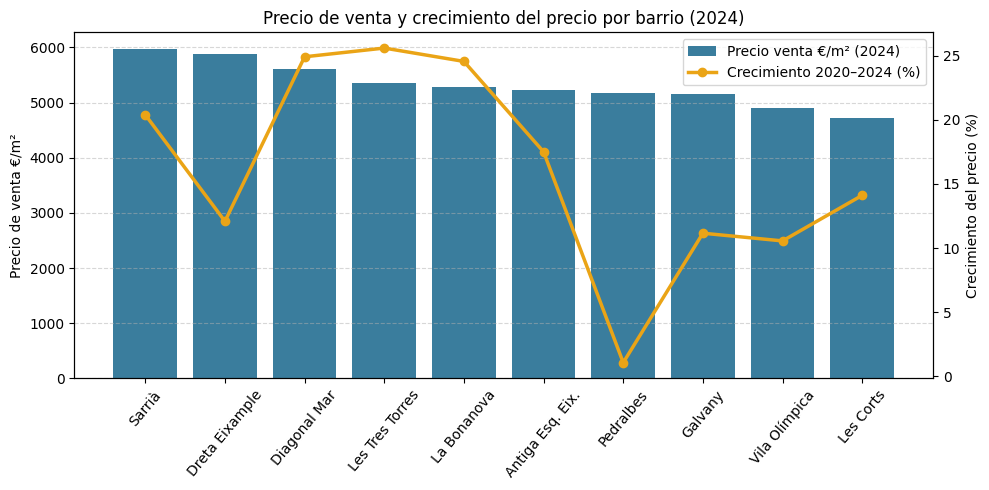

In [ ]:
abreviar = {
    "Diagonal Mar i el Front Marítim del Poblenou": "Diagonal Mar",
    "Sant Gervasi - Galvany": "S. Gervasi - Galvany",
    "la Dreta de l'Eixample": "Dreta Eixample",
    "la Vila Olímpica del Poblenou": "Vila Olímpica",
    "Sant Gervasi - la Bonanova": "la Bonanova",
    "Sant Gervasi - Galvany": "Galvany",
    "l'Antiga Esquerra de l'Eixample": "Antiga Esq. Eix."
}

df_final["Barrio_corto"] = df_final["Barrio"].replace(abreviar)

df_final["Barrio_multilinea"] = (
    df_final["Barrio"]
    .str.replace(" i ", "\n", regex=False)
    .str.replace(" - ", "\n", regex=False)
)

# ¿Los barrios con precios de venta más altos en 2024 son también los que han experimentado el mayor crecimiento del precio entre 2020 y 2024?

import matplotlib.pyplot as plt

# Top 10 barrios por precio (2024)
top10_mix = (
    df_final[df_final['Año'] == 2024]
    .sort_values('Venta', ascending=False)
    .head(10)
    .copy()
)

# Crear columna de display 
top10_mix['Barrio_display'] = top10_mix['Barrio_corto'].str.title()

# Calcular crecimiento en %
top10_mix['crecimiento_pct'] = top10_mix['Crecimiento_Venta'] 

# Gráfico barras + línea
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras → precio de venta
ax1.bar(
    top10_mix['Barrio_display'],
    top10_mix['Venta'],
    color="#17668c",
    alpha=0.85,
    label='Precio venta €/m² (2024)'
)

ax1.set_ylabel('Precio de venta €/m²')

# Línea → crecimiento
ax2 = ax1.twinx()
ax2.plot(
    top10_mix['Barrio_display'],
    top10_mix['crecimiento_pct'],
    color="#eaa416",
    marker='o',
    linewidth=2.5,
    label='Crecimiento 2020–2024 (%)'
)

ax2.set_ylabel('Crecimiento del precio (%)')

# Título
plt.title('Precio de venta y crecimiento del precio por barrio (2024)')

# Rotar etiquetas eje X
ax1.tick_params(axis='x', rotation=50)

# Grid para barras
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper right'
)

plt.tight_layout()
plt.show()

# Exportar CSV para Flourish
export_top10 = top10_mix[[
    'Barrio_display',
    'Venta',
    'crecimiento_pct'
]].copy()

#export_top10.to_csv(
#    'precio_venta_y_crecimiento_barrios_2024.csv',
#    index=False
#)


# En este gráfico comparamos el precio de venta por metro cuadrado en 2024 con el crecimiento de precios entre 2020 y 2024 por barrio. 
# Se observa que los barrios más caros, como Sarrià o la Dreta de l’Eixample, muestran crecimientos más moderados, 
# lo que indica mercados consolidados. En cambio, zonas como Diagonal Mar o Les Tres Torres destacan por combinar precios altos con un fuerte crecimiento, 
# señalando una mayor presión de demanda. 
# Esto demuestra que precio y crecimiento no siempre van de la mano y que es clave analizar ambas variables para entender la dinámica inmobiliaria



In [13]:
df_final["Barrio"].unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble-sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

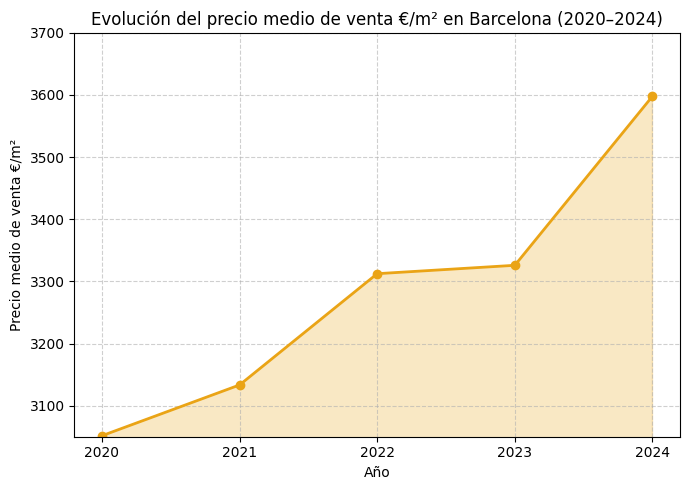

In [ ]:
import matplotlib.pyplot as plt

# PASO 1 — Precio medio de venta por año (Barcelona)
precio_anual = (
    df_final
    .groupby('Año', as_index=False)['Venta']
    .mean()
)

# PASO 2 — Gráfico
plt.figure(figsize=(7, 5))

# Área
plt.fill_between(
    precio_anual['Año'],
    precio_anual['Venta'],
    alpha=0.25,
    color="#eaa416"
)

# Línea 
plt.plot(
    precio_anual['Año'],
    precio_anual['Venta'],
    marker='o',
    linewidth=2,
    color="#eaa416"
)

plt.title('Evolución del precio medio de venta €/m² en Barcelona (2020–2024)')
plt.xlabel('Año')
plt.ylabel('Precio medio de venta €/m²')

# Años enteros
plt.xticks(precio_anual['Año'], precio_anual['Año'].astype(int))

# Eje Y desde 3000
plt.ylim(3050, 3700)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

precio_anual = precio_anual.rename(
    columns={'Venta': 'Venta_m2_media'}
)


In [15]:
df_final[
    (df_final["Barrio"].isin(["Vallbona", "Can Peguera", "la Clota"])) &
    (df_final["Año"].isin([2020, 2024]))
][["Barrio","Año","Venta"]]


,Barrio,Año,Venta
41,la Clota,2020,2400.00
46,Can Peguera,2020,2300.00
55,Vallbona,2020,1194.80
329,la Clota,2024,3707.21
334,Can Peguera,2024,2267.40
343,Vallbona,2024,1507.00


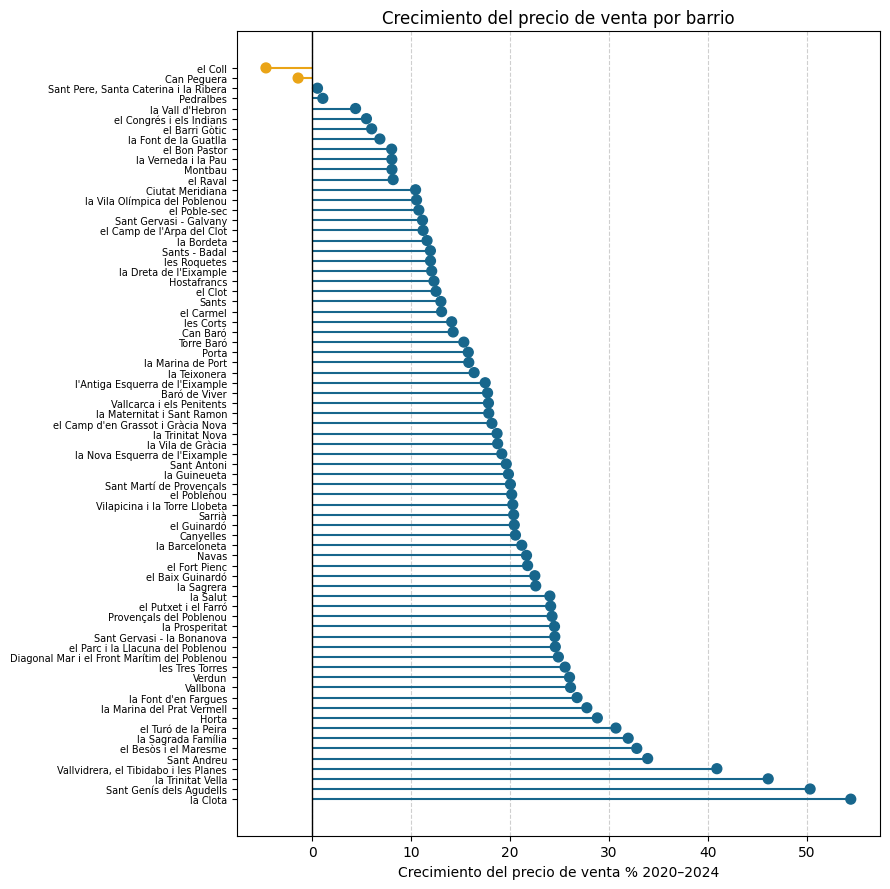

In [ ]:
# Crecimiento del precio de venta por barrio en Barcelona (2020–2024) 
# -- un poco redundante con el grafico de arriba pero al comparar con el total de barrios notamos que solo dos han decrecido, El Coll y Can Peguera.

import matplotlib.pyplot as plt

# Ordenar por crecimiento
lollipop_df = (
    crecimiento
    .sort_values('Crecimiento_Venta', ascending=False)
    .copy()
)


# Pasar a porcentaje
# Forzar uso del porcentaje correcto
lollipop_df = crecimiento.copy()

lollipop_df = lollipop_df.sort_values(
    'Crecimiento_Venta', ascending=False
)

lollipop_df['crecimiento_pct'] = lollipop_df['Crecimiento_Venta']


# Figura
plt.figure(figsize=(9, 9))

# Colores según crecimiento
colors = lollipop_df['crecimiento_pct'].apply(
    lambda x: "#17668c" if x >= 0 else "#eaa416"
)

# Líneas (lollipop)
plt.hlines(
    y=lollipop_df['Barrio'],
    xmin=0,
    xmax=lollipop_df['crecimiento_pct'],
    color=colors,
    linewidth=1.5
)

# Puntos
plt.scatter(
    lollipop_df['crecimiento_pct'],
    lollipop_df['Barrio'],
    color=colors,
    s=50,
    zorder=2
)

# Línea base
plt.axvline(0, color='black', linewidth=1)

# Etiquetas y estilo
plt.xlabel('Crecimiento del precio de venta % 2020–2024')
plt.title('Crecimiento del precio de venta por barrio')
plt.yticks(fontsize=7)

plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



# El gráfico muestra que el crecimiento del precio de venta entre 2020 y 2024 no ha sido homogéneo entre los barrios de Barcelona. 
# Mientras la mayoría presenta aumentos moderados, algunos barrios destacan con crecimientos muy superiores al promedio, 
# evidenciando una mayor presión de demanda y procesos de revalorización más intensos.

In [17]:
crecimiento['Crecimiento_Venta'].describe()

count    73.000000
mean     18.705616
std      10.818056
min      -4.670000
25%      11.960000
50%      18.700000
75%      24.260000
max      54.470000
Name: Crecimiento_Venta, dtype: float64

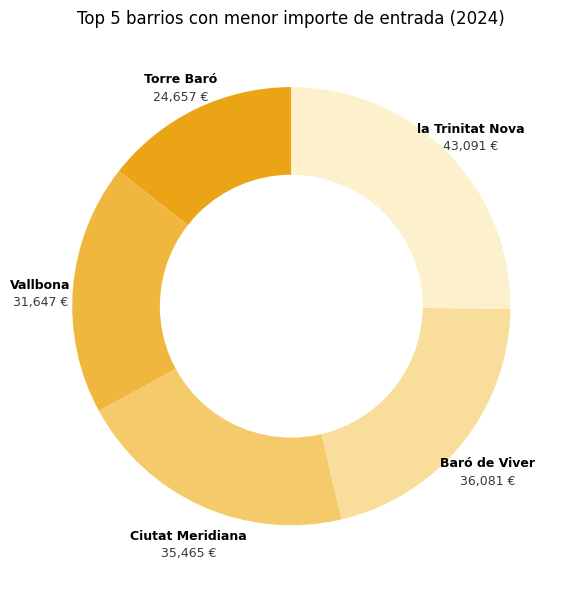

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# DATA — Top 5 barrios más baratos (2024)
top5_baratos = (
    df_final[df_final["Año"] == 2024]
    .groupby("Barrio", as_index=False)["Importe_Entrada"]
    .mean()
    .query("Importe_Entrada > 0")
    .sort_values("Importe_Entrada")
    .head(5)
)

# COLORES (más barato → más oscuro)
colors = [
    "#eaa416",  # base
    "#f0b73f",
    "#f5ca6a",
    "#f9dd9a",
    "#fdf0cc"
]

# FIGURA
plt.figure(figsize=(6, 6))

wedges, _ = plt.pie(
    top5_baratos["Importe_Entrada"],
    startangle=90,
    colors=colors
)

# Agujero central (donut)
centre_circle = plt.Circle((0, 0), 0.60, fc="white")
plt.gca().add_artist(centre_circle)

# ETIQUETAS FUERA (nombre + valor debajo)
for i, w in enumerate(wedges):
    ang = (w.theta2 + w.theta1) / 2

    # Posición base (fuera del donut)
    r = 1.15
    x = r * np.cos(np.deg2rad(ang))
    y = r * np.sin(np.deg2rad(ang))

    barrio = top5_baratos.iloc[i]["Barrio"]
    valor = top5_baratos.iloc[i]["Importe_Entrada"]

    # Nombre del barrio
    plt.text(
        x, y,
        barrio,
        ha="center",
        va="center",
        fontsize=9,
        fontweight="bold"
    )

    # Valor debajo del nombre
    plt.text(
        x, y - 0.08,
        f"{valor:,.0f} €",
        ha="center",
        va="center",
        fontsize=9,
        color="#3B3939"
    )

# TÍTULO Y AJUSTES FINALES
plt.title("Top 5 barrios con menor importe de entrada (2024)")
plt.tight_layout()
plt.show()


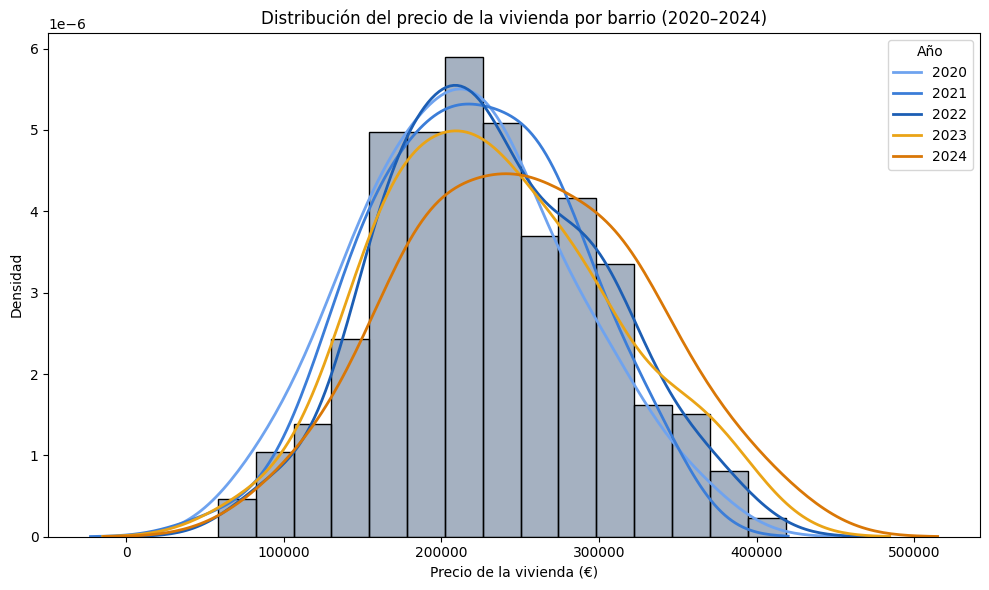

In [19]:
df_plot = df_final[
    (df_final["Año"].between(2020, 2024)) &
    (df_final["Precio_Vivienda"] > 0)
]

import matplotlib.pyplot as plt
import seaborn as sns

years = [2020, 2021, 2022, 2023, 2024]

palette = {
    2020: "#6fa3ef",
    2021: "#3b7dd8",
    2022: "#1c5eb4",
    2023: "#eaa416",
    2024: "#d97706"
}

# Datos limpios
df_plot = df_final[
    (df_final["Año"].isin(years)) &
    (df_final["Precio_Vivienda"] > 0)
]

plt.figure(figsize=(10, 6))

# Histograma base (densidad)
sns.histplot(
    df_plot["Precio_Vivienda"],
    bins=15,
    stat="density",
    color="#1f3d64",
    alpha=0.4
)

# KDE por año
for year in years:
    sns.kdeplot(
        df_plot[df_plot["Año"] == year]["Precio_Vivienda"],
        color=palette[year],
        linewidth=2,
        label=str(year)
    )

plt.title("Distribución del precio de la vivienda por barrio (2020–2024)")
plt.xlabel("Precio de la vivienda (€)")
plt.ylabel("Densidad")
plt.legend(title="Año")
plt.tight_layout()
plt.show()



In [20]:
df_final['Estado_Accesibilidad'] = np.where(
    df_final['Precio_Vivienda'] <= df_final['Precio_Adquirible'],
    'Accesible',
    'No accesible'
)
df_2024 = df_final[df_final['Año'] == 2024]

df_2024.to_csv("accesibilidad_hierarchical_2024.csv", index=False)


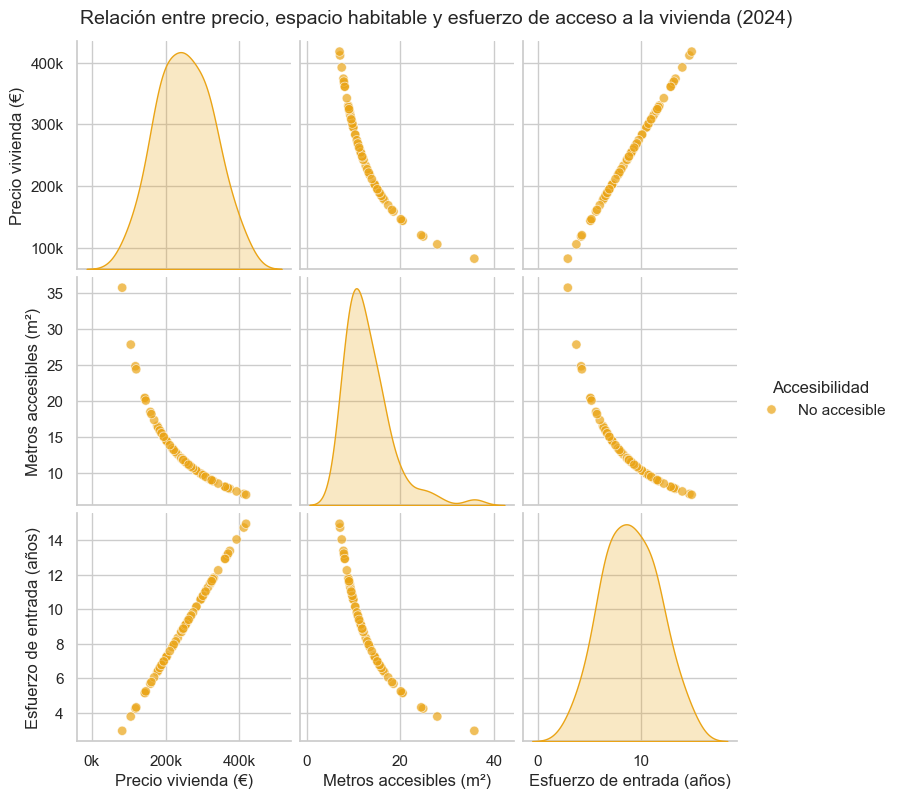

In [ ]:
df_plot = (
    df_final[df_final["Año"] == 2024]
    .copy()
)

df_plot["Accesibilidad"] = df_plot["Accesibilidad_Real"].apply(
    lambda x: "Accesible" if x <= 1 else "No accesible"
)

df_plot = df_plot[
    ["Precio_Vivienda", "Metros_Accesibles", "Esfuerzo_Entrada", "Accesibilidad"]
].dropna()
palette = {
    "Accesible": "#17668c",
    "No accesible": "#eaa416"
}
labels = {
    "Precio_Vivienda": "Precio vivienda (€)",
    "Metros_Accesibles": "Metros accesibles (m²)",
    "Esfuerzo_Entrada": "Esfuerzo de entrada (años)"
}

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
df_plot_labels = df_plot.rename(columns=labels)
g = sns.pairplot(
    df_plot_labels,               
    vars=list(labels.values()),   
    hue="Accesibilidad",
    palette=palette,
    diag_kind="kde",
    plot_kws={
        "alpha": 0.7,
        "s": 45,
        "edgecolor": "white"
    },
    height=2.6
)

g.fig.suptitle(
    "Relación entre precio, espacio habitable y esfuerzo de acceso a la vivienda (2024)",
    fontsize=14,
    y=1.02
)

from matplotlib.ticker import FuncFormatter

def miles_k(x, pos):
    return f'{int(x/1000)}k'

# Eje X donde Precio_Vivienda está en columnas
for ax in g.axes[:, 0]:
    if ax is not None:
        ax.xaxis.set_major_formatter(FuncFormatter(miles_k))

# Eje Y donde Precio_Vivienda está en filas
for ax in g.axes[0, :]:
    if ax is not None:
        ax.yaxis.set_major_formatter(FuncFormatter(miles_k))


plt.show()

#“¿Cómo se comportan Precio_Vivienda", "Metros_Accesibles", "Esfuerzo_Compra?”


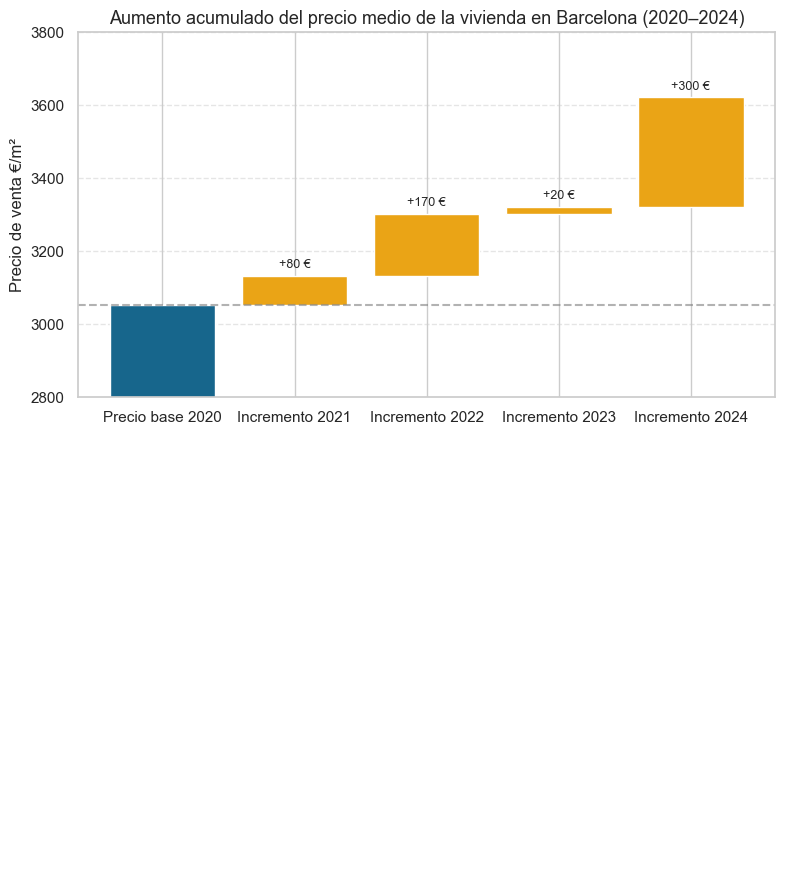

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# DATOS
precio_2020 = 3050   # €/m²
inc_2021 = 80
inc_2022 = 170
inc_2023 = 20
inc_2024 = 300

labels = [
    "Precio base 2020",
    "Incremento 2021",
    "Incremento 2022",
    "Incremento 2023",
    "Incremento 2024"
]

values = [
    precio_2020,
    inc_2021,
    inc_2022,
    inc_2023,
    inc_2024
]

# CÁLCULO DE LA CASCADA
cumulative = np.cumsum(values)
starts = cumulative - values

# COLORES
colors = [
    "#17668c",  # base
    "#eaa416",
    "#eaa416",
    "#eaa416",
    "#eaa416"
]

# GRÁFICO
plt.figure(figsize=(9, 5))

plt.bar(
    labels,
    values,
    bottom=starts,
    color=colors,
    edgecolor="white"
)

# ETIQUETAS DE VALOR
for i, value in enumerate(values):
    if i == 0:
        plt.text(
            i,
            starts[i] + value / 2,
            f"{value:,.0f} €",
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )
    else:
        plt.text(
            i,
            cumulative[i] + 15,
            f"+{value:,.0f} €",
            ha="center",
            va="bottom",
            fontsize=9
        )

# LÍNEA DE REFERENCIA (PRECIO 2020)
plt.axhline(
    precio_2020,
    linestyle="--",
    color="gray",
    alpha=0.6
)


# AJUSTE CORRECTO DEL EJE Y  
plt.ylim(2800, 3800)

# ESTILO FINAL
plt.title(
    "Aumento acumulado del precio medio de la vivienda en Barcelona (2020–2024)",
    fontsize=13
)
plt.ylabel("Precio de venta €/m²")

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.subplots_adjust(top=0.88, bottom=0.15)
plt.show()


C:\Users\Dami\AppData\Local\Temp\ipykernel_19564\1536573878.py:127: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


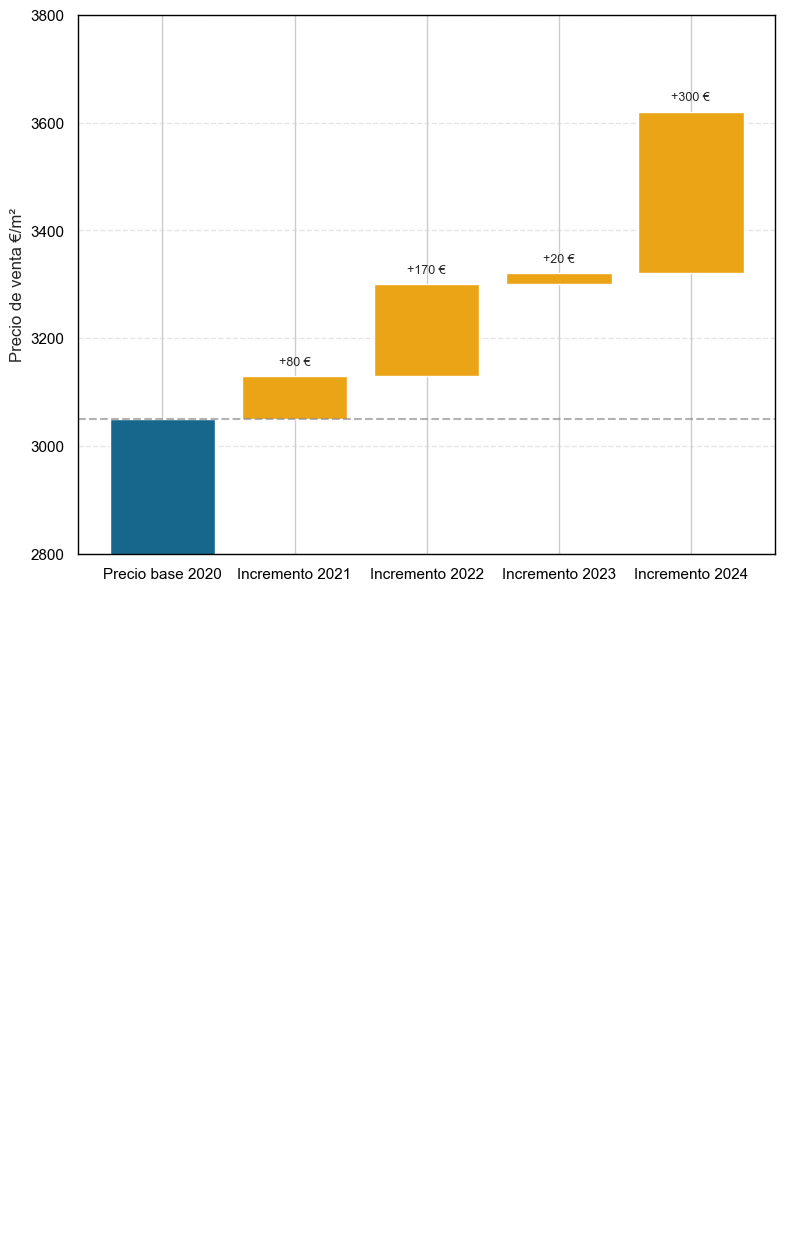

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# DATOS
precio_2020 = 3050   # €/m²
inc_2021 = 80
inc_2022 = 170
inc_2023 = 20
inc_2024 = 300

labels = [
    "Precio base 2020",
    "Incremento 2021",
    "Incremento 2022",
    "Incremento 2023",
    "Incremento 2024"
]

values = [
    precio_2020,
    inc_2021,
    inc_2022,
    inc_2023,
    inc_2024
]

# CÁLCULO DE LA CASCADA
cumulative = np.cumsum(values)
starts = cumulative - values

# COLORES
colors = [
    "#17668c",  # base
    "#eaa416",
    "#eaa416",
    "#eaa416",
    "#eaa416"
]

# GRÁFICO (FIGURA MÁS CUADRADA)

fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(
    labels,
    values,
    bottom=starts,
    color=colors,
    edgecolor="white"
)

# ETIQUETAS DE VALOR
for i, value in enumerate(values):
    if i == 0:
        ax.text(
            i,
            starts[i] + value / 2,
            f"{value:,.0f} €",
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )
    else:
        ax.text(
            i,
            cumulative[i] + 15,
            f"+{value:,.0f} €",
            ha="center",
            va="bottom",
            fontsize=9
        )

# LÍNEA DE REFERENCIA (PRECIO 2020)
ax.axhline(
    precio_2020,
    linestyle="--",
    color="gray",
    alpha=0.6
)


# AJUSTE DE EJES
ax.set_ylim(2800, 3800)

# MARCOS (SPINES) EN NEGRITO  
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Ticks un poco más marcados
ax.tick_params(width=1.0)

# ESTILO FINAL

#ax.set_title(
#    "Aumento acumulado del precio medio de la vivienda en Barcelona (2020–2024)",
#    fontsize=13
#)
ax.set_ylabel("Precio de venta €/m²")

ax.grid(axis="y", linestyle="--", alpha=0.5)

# Marcos en negro y más visibles
for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color("black")

ax.tick_params(colors="black", width=1.5)

plt.tight_layout()
plt.show()


In [29]:
#pip install plotly pandas


In [30]:
# pip install nbformat


In [ ]:
# Para crear simulador
import pandas as pd
import plotly.graph_objects as go

# CARGAR DATA
df = df_final.copy()  # si ya lo tienes en memoria
# Si no:
# df = pd.read_csv("tu_archivo.csv")

# FILTRAR AÑO 2024
df_2024 = df[df["Año"] == 2024].copy()

# Nos quedamos solo con barrio y precio m2
df_2024 = df_2024[["Barrio", "Venta"]]

print(df_2024.head())



                                    Barrio    Venta
288                               el Raval  3148.48
289                         el Barri Gòtic  4434.83
290                         la Barceloneta  4580.25
291  Sant Pere, Santa Caterina i la Ribera  4368.58
292                          el Fort Pienc  4253.40


In [ ]:
# INPUTS + CÁLCULOS + RESULTADOS
barrio = input("Introduce el barrio exactamente como aparece en la base: ")
metros = float(input("Metros cuadrados deseados: "))
salario_anual = float(input("Salario anual del hogar (€): "))

precio_m2 = df_2024[df_2024["Barrio"] == barrio]["Venta"].values[0]

precio_total = precio_m2 * metros
entrada = precio_total * 0.30
años_ahorro = entrada / salario_anual

print("\nRESULTADOS")
print(f"Precio por m2 en {barrio}: {precio_m2:,.0f} €")
print(f"Precio total vivienda: {precio_total:,.0f} €")
print(f"Entrada necesaria (30%): {entrada:,.0f} €")
print(f"Años necesarios para ahorrar entrada: {años_ahorro:.2f}")



RESULTADOS
Precio por m2 en el Raval: 3,148 €
Precio total vivienda: 220,394 €
Entrada necesaria (30%): 66,118 €
Años necesarios para ahorrar entrada: 1.65


In [33]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=["Años necesarios"],
    y=[años_ahorro],
    name="Esfuerzo real"
))

fig.add_trace(go.Bar(
    x=["Años necesarios"],
    y=[5],
    name="Umbral razonable (5 años)"
))

fig.update_layout(
    title=f"Simulación de accesibilidad – {barrio}",
    yaxis_title="Años de ahorro",
    barmode="group"
)

fig.show(renderer="browser")


fig.write_html("simulador.html")


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# CARGA DATA

df_2024 = df_final[df_final["Año"] == 2024]

barrios = df_2024["Barrio"].unique()

# Valores por defecto
metros = 70
salario_anual = 30000

# FUNCIÓN DE CÁLCULO
def calcular(barrio, metros, salario):
    precio_m2 = df_2024[df_2024["Barrio"] == barrio]["Venta"].values[0]
    precio_total = precio_m2 * metros
    entrada = precio_total * 0.30
    años = entrada / salario
    return años

# CREAR FIGURA
fig = go.Figure()

# Añadimos una barra inicial
años_inicial = calcular(barrios[0], metros, salario_anual)

fig.add_trace(go.Bar(
    x=["Años necesarios"],
    y=[años_inicial],
    name="Esfuerzo"
))

# Dropdown dinámico
buttons = []

for barrio in barrios:
    años = calcular(barrio, metros, salario_anual)

    buttons.append(dict(
        label=barrio,
        method="update",
        args=[{"y": [[años]]},
              {"title": f"Simulación – {barrio}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True
        )
    ],
    title=f"Simulación – {barrios[0]}",
    yaxis_title="Años de ahorro"
)

fig.write_html("simulador_interactivo.html")


In [35]:
#pip install dash plotly pandas


In [36]:
import pandas as pd
import json

df = pd.read_csv(r"C:\Users\Dami\Desktop\Proyecto_Final_Bootcamp\notebooks\df_final.csv")
df_2024 = df[df["Año"] == 2024]

diccionario = dict(zip(df_2024["Barrio"], df_2024["Venta"]))

print(json.dumps(diccionario, indent=4, ensure_ascii=False))


{
    "el Raval": 3148.48,
    "el Barri Gòtic": 4434.83,
    "la Barceloneta": 4580.25,
    "Sant Pere, Santa Caterina i la Ribera": 4368.58,
    "el Fort Pienc": 4253.4,
    "la Sagrada Família": 4566.29,
    "la Dreta de l'Eixample": 5888.2,
    "l'Antiga Esquerra de l'Eixample": 5228.42,
    "la Nova Esquerra de l'Eixample": 4499.91,
    "Sant Antoni": 4278.63,
    "el Poble Sec - AEI Parc Montjuïc": NaN,
    "la Marina del Prat Vermell - AEI Zona Franca": 2619.19,
    "la Marina de Port": 2640.59,
    "la Font de la Guatlla": 3467.24,
    "Hostafrancs": 3761.8,
    "la Bordeta": 3329.91,
    "Sants - Badal": 3490.02,
    "Sants": 3805.05,
    "les Corts": 4724.97,
    "la Maternitat i Sant Ramon": 4218.51,
    "Pedralbes": 5168.15,
    "Vallvidrera, el Tibidabo i les Planes": 4594.5,
    "Sarrià": 5975.88,
    "les Tres Torres": 5348.25,
    "Sant Gervasi - la Bonanova": 5281.76,
    "Sant Gervasi - Galvany": 5160.27,
    "el Putxet i el Farró": 4630.43,
    "Vallcarca i els Penit

In [37]:
df_distrito = pd.read_csv(r"C:\Users\Dami\Downloads\BarcelonaCiutat_Barris (1).csv")
df_distrito.columns

df_final = df_final.merge(
    df_distrito[["nom_barri", "nom_districte"]],
    left_on="Barrio",
    right_on="nom_barri",
    how="left"
)
df_final




,Barrio,Año,Alquiler,Venta,Poblacion,Salario/hogar,Crecimiento_Venta,Precio_Vivienda,Esfuerzo_Compra,Importe_Entrada,...,Esfuerzo_Entrada,Metros_Accesibles,Presion_Compra,Accesibilidad_Real,Precio_Adquirible,Barrio_corto,Barrio_multilinea,Estado_Accesibilidad,nom_barri,nom_districte
0,el Raval,2020,833.87,2910.10,47971.92,35030,8.19,203707,5.82,61112,...,8.72,12.04,0.48,6.69,175150,el Raval,el Raval,No accesible,el Raval,Ciutat Vella
1,el Barri Gòtic,2020,1035.78,4183.06,22146.92,35030,6.02,292814,8.36,87844,...,12.54,8.37,0.50,9.61,175150,el Barri Gòtic,el Barri Gòtic,No accesible,el Barri Gòtic,Ciutat Vella
2,la Barceloneta,2020,867.95,3779.24,14983.58,35030,21.20,264546,7.55,79363,...,11.33,9.27,1.60,8.68,175150,la Barceloneta,la Barceloneta,No accesible,la Barceloneta,Ciutat Vella
3,"Sant Pere, Santa Caterina i la Ribera",2020,954.48,4344.93,22827.92,35030,0.54,304145,8.68,91243,...,13.02,8.06,0.05,9.98,175150,"Sant Pere, Santa Caterina i la Ribera","Sant Pere, Santa Caterina\nla Ribera",No accesible,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella
4,el Fort Pienc,2020,1003.12,3492.44,33175.17,35030,21.79,244470,6.98,73341,...,10.47,10.03,1.52,8.03,175150,el Fort Pienc,el Fort Pienc,No accesible,el Fort Pienc,Eixample
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Sant Andreu,2020,NaN,2800.00,55300.00,35030,33.93,196000,5.60,58800,...,8.39,12.51,1.90,6.44,175150,Sant Andreu,Sant Andreu,No accesible,Sant Andreu,Sant Andreu
361,Sant Andreu,2021,NaN,3000.00,56000.00,34982,33.93,210000,6.00,63000,...,9.00,11.66,2.04,6.90,174910,Sant Andreu,Sant Andreu,No accesible,Sant Andreu,Sant Andreu
362,Sant Andreu,2022,NaN,3200.00,56700.00,36163,33.93,224000,6.19,67200,...,9.29,11.30,2.10,7.12,180815,Sant Andreu,Sant Andreu,No accesible,Sant Andreu,Sant Andreu
363,Sant Andreu,2023,NaN,3467.00,57400.00,38888,33.93,242690,6.24,72807,...,9.36,11.22,2.12,7.18,194440,Sant Andreu,Sant Andreu,No accesible,Sant Andreu,Sant Andreu


In [ ]:
# PARÁMETOS
metros = 70
porcentaje_entrada = 0.30
porcentaje_ahorro = 0.20

# CÁLCULO AÑOS AHORRO
df_final["precio_total"] = df_final["Venta"] * metros
df_final["entrada"] = df_final["precio_total"] * porcentaje_entrada
df_final["ahorro_anual"] = df_final["Salario/hogar"] * porcentaje_ahorro
df_final["años_ahorro"] = df_final["entrada"] / df_final["ahorro_anual"]

# CREAR NIVEL
def clasificar(años):
    if años <= 5:
        return "Alta accesibilidad"
    elif años <= 10:
        return "Accesibilidad moderada"
    else:
        return "Baja accesibilidad"

df_final["Nivel_accesibilidad"] = df_final["años_ahorro"].apply(clasificar)

print(df_final[["Barrio", "años_ahorro", "Nivel_accesibilidad"]].head())
df_final.to_csv("df_final_con_nivel.csv", index=False)




                                  Barrio  años_ahorro     Nivel_accesibilidad
0                               el Raval     8.722823  Accesibilidad moderada
1                         el Barri Gòtic    12.538433      Baja accesibilidad
2                         la Barceloneta    11.328010      Baja accesibilidad
3  Sant Pere, Santa Caterina i la Ribera    13.023627      Baja accesibilidad
4                          el Fort Pienc    10.468347      Baja accesibilidad


In [39]:
df_3_niveles = pd.read_csv(r"C:\Users\Dami\Desktop\Proyecto_Final_Bootcamp\notebooks_limpio\df_final_con_nivel.csv")
df_3_niveles

df_2024 = df_3_niveles[df_3_niveles["Año"] == 2024]
df_2024.to_csv("barrios_2024.csv", index=False)